# Testing by solving Maxwell's equations in vacuum

In [1]:
from BeyoundEffMass import *

Initial condition

In [2]:
def Ez_init(x):
    return np.exp(-2 * (x - 0.1) ** 2) * np.sin(4 * (x - 0.1))

x_offset = -2
x, Δx = np.linspace(x_offset, 10, 500, retstep=True)

Δt = 0.01 * Δx / c

In [3]:
sys = CBeyondEffMass(Δt = Δt, Δx1 = Δx, Ez_init = Ez_init(x))

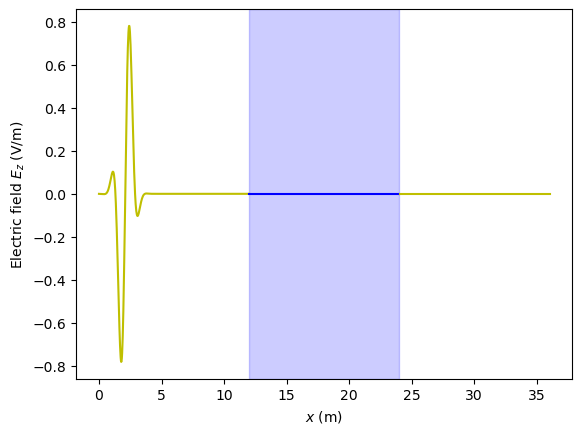

In [4]:
sys.plot_Ez()

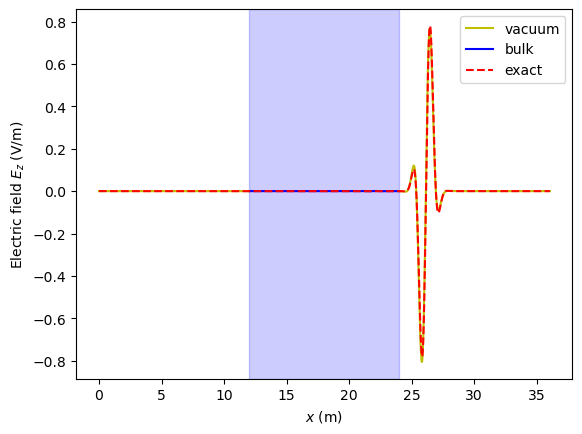

In [5]:
# propagation
n_steps = 100000
t = n_steps * Δt

for _ in range(n_steps):
    sys.single_step_propagation()

sys.plot_Ez()

full_x = np.hstack([sys.x1, sys.x2, sys.x3])

plt.plot(full_x, Ez_init(full_x + x_offset - c * t), '--r', label="exact")

plt.legend()
plt.show()